In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r'C:\Users\tomfe\OneDrive\Desktop\Tutorial\hsa-incidents-2017-2021.csv'  # Update this with the path to your dataset
accidents_data = pd.read_csv(file_path)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [7]:
accidents_data.head(10)

,Age,Gender,NACE Sector,Incident Type,Employment Status,Year,County,Trigger
0,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Carlow,"Lifting, carrying"
1,0-17 Years,Female,C - MANUFACTURING,Non-fatal injury,Employee,2017,Dublin,Other triggers not listed
2,0-17 Years,Female,Q - HUMAN HEALTH AND SOCIAL WORK ACTIVITIES,Non-fatal injury,Employee,2017,Dublin,"Fall on same level (slip, stumble etc)"
3,0-17 Years,Male,C - MANUFACTURING,Non-fatal injury,Employee,2017,Offaly,"Pushing, pulling"
4,0-17 Years,Male,I - ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non-fatal injury,Employee,2017,Dublin,Loss of control of machine
5,0-17 Years,Female,I - ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non-fatal injury,Employee,2017,Sligo,Loss of control of object being worked on
6,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Dublin,Fall from height
7,0-17 Years,Male,P - EDUCATION,Non-fatal injury,Employee,2018,Meath,Loss of control of machine
8,0-17 Years,Male,G - WHOLESALE AND RETAIL TRADE;REPAIR OF MOTOR...,Non-fatal injury,Employee,2018,Cork,Other triggers not listed
9,0-17 Years,Female,I - ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non-fatal injury,Employee,2018,Donegal,Other triggers not listed


In [8]:
# Calculate the number of incidents per year
incidents_per_year = accidents_data.groupby('Year').size().reset_index(name='Number of Incidents')

# Display the result
print(incidents_per_year)

   Year  Number of Incidents
0  2017                 9705
1  2018                 9804
2  2019                 9735
3  2020                 7985
4  2021                 8668


In [9]:
# Merge the count back into the original DataFrame
accidents_data_merged = accidents_data.merge(incidents_per_year, on='Year', how='left')

# Show the first few rows to verify
print(accidents_data_merged.head())

          Age Gender                                      NACE Sector  \
0  0-17 Years     Male                               F - CONSTRUCTION   
1  0-17 Years   Female                              C - MANUFACTURING   
2  0-17 Years   Female    Q - HUMAN HEALTH AND SOCIAL WORK ACTIVITIES   
3  0-17 Years     Male                              C - MANUFACTURING   
4  0-17 Years     Male  I - ACCOMMODATION AND FOOD SERVICE ACTIVITIES   

      Incident Type Employment Status    Year  County  \
0  Non-fatal injury            Employee  2017  Carlow   
1  Non-fatal injury            Employee  2017  Dublin   
2  Non-fatal injury            Employee  2017  Dublin   
3  Non-fatal injury            Employee  2017  Offaly   
4  Non-fatal injury            Employee  2017  Dublin   

                                  Trigger  Number of Incidents  
0                       Lifting, carrying                 9705  
1               Other triggers not listed                 9705  
2  Fall on same level (

In [10]:
# Data Cleaning
# Remove leading and trailing spaces in column names
accidents_data.columns = accidents_data.columns.str.strip()

In [11]:
# Remove rows where 'County' is missing and impute missing values for categorical columns
accidents_data_cleaned = accidents_data.dropna(subset=['County']).copy()
for column in ['Age', 'Gender', 'Employment Status', 'Trigger']:
    mode_value = accidents_data_cleaned[column].mode()[0]
    accidents_data_cleaned[column].fillna(mode_value, inplace=True)

In [12]:
# Descriptive Statistics & Trend Analysis
gender_distribution = accidents_data_cleaned['Gender'].value_counts()
sector_distribution = accidents_data_cleaned['NACE Sector'].value_counts()
incident_type_distribution = accidents_data_cleaned['Incident Type'].value_counts()
yearly_distribution = accidents_data_cleaned['Year'].value_counts().sort_index()

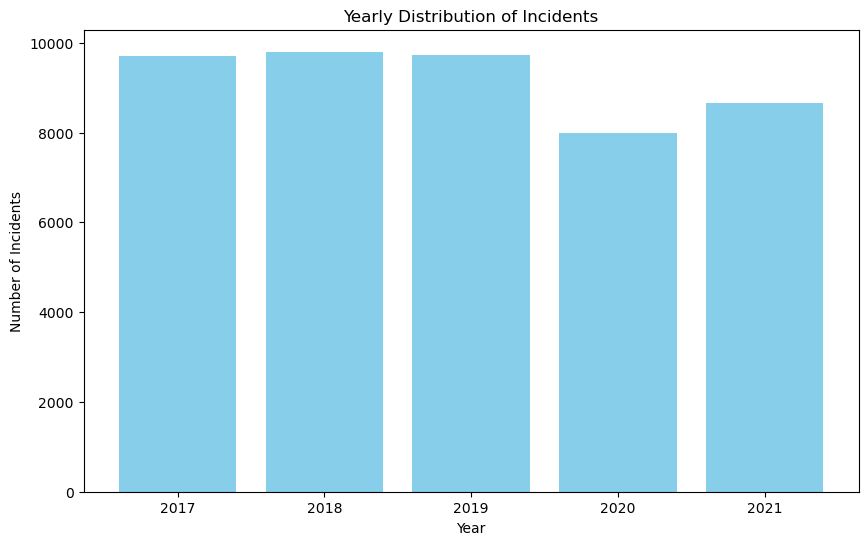

In [13]:
# Trend Analysis - Yearly Distribution of Incidents
plt.figure(figsize=(10, 6))
plt.bar(yearly_distribution.index, yearly_distribution.values, color='skyblue')
plt.title('Yearly Distribution of Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()
#Apparantly incidents drop in 2020, probably because of COVID and a lot of people stayed at home.

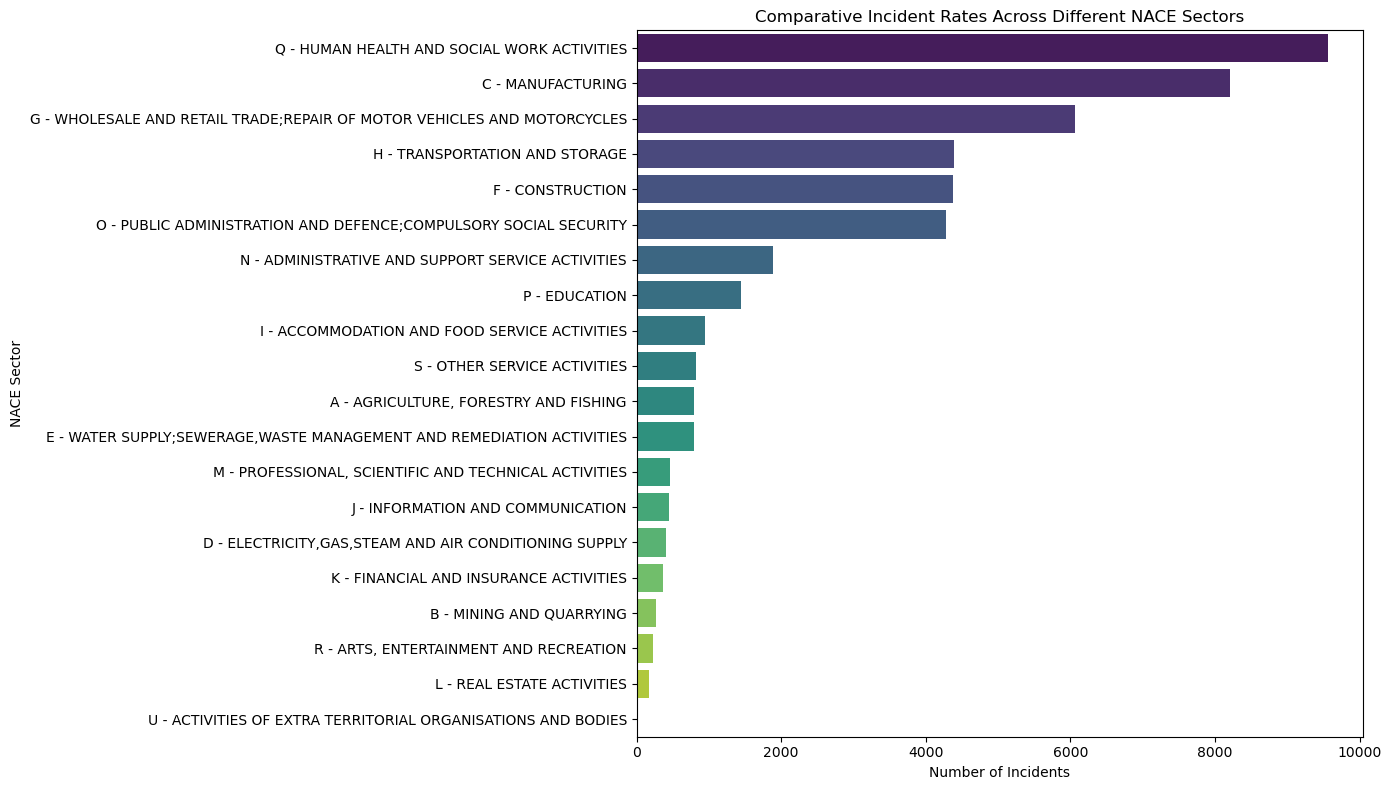

In [35]:
#Number of incidencts across different Nace Sectors
plt.figure(figsize=(14, 8))
sector_order = accidents_data['NACE Sector'].value_counts().index
sns.countplot(data=accidents_data, y='NACE Sector', order=sector_order, palette='viridis')
plt.title('Comparative Incident Rates Across Different NACE Sectors')
plt.xlabel('Number of Incidents')
plt.ylabel('NACE Sector')
plt.tight_layout()
#Here we can see that social workers have the most incidents. It is probably related to working in bad social areas, 
#with homeless people, drug addicts and dangerous areas.

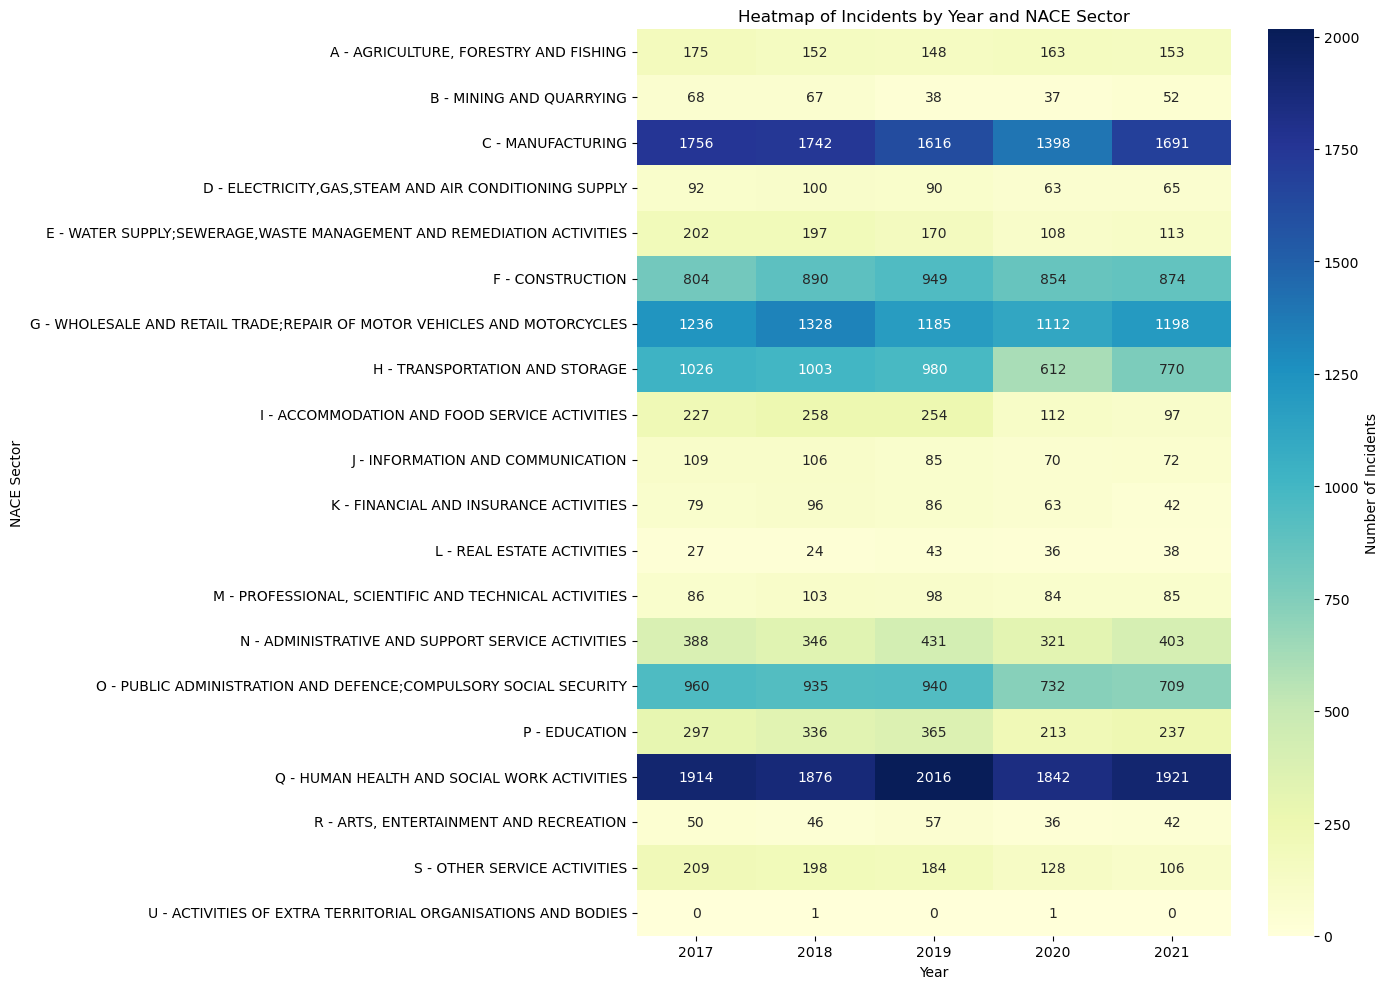

In [15]:
# Transforming data for heatmap: Incidents by Year and NACE Sector
incident_heatmap_data = accidents_data.pivot_table(index='NACE Sector', columns='Year', aggfunc='size', fill_value=0)

# Creating a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(incident_heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={'label': 'Number of Incidents'})
plt.title('Heatmap of Incidents by Year and NACE Sector')
plt.xlabel('Year')
plt.ylabel('NACE Sector')
plt.tight_layout()

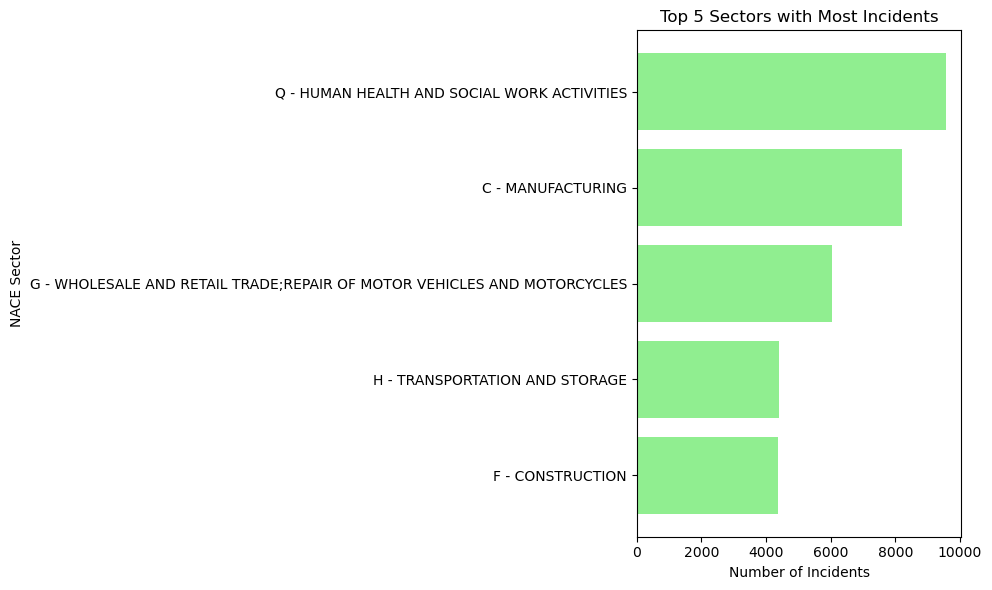

In [34]:
# Sector Analysis - Top 5 Sectors with Most Incidents using a horizontal bar chart
top_sectors = sector_distribution.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_sectors.index, top_sectors.values, color='lightgreen')
plt.title('Top 5 Sectors with Most Incidents')
plt.ylabel('NACE Sector')
plt.xlabel('Number of Incidents')
# Reversing the order so the top sector is at the top of the chart
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
#Here is the top 5 industries with most incidents, manufacturing is going as strong second. 
#Makes sense, a lot bad accidents can happen in the factory production line, the machines are dangerous.
#Some people would be surprised to see Construction to be only 5th, but I am guessing safety messuers there are way more controllable.

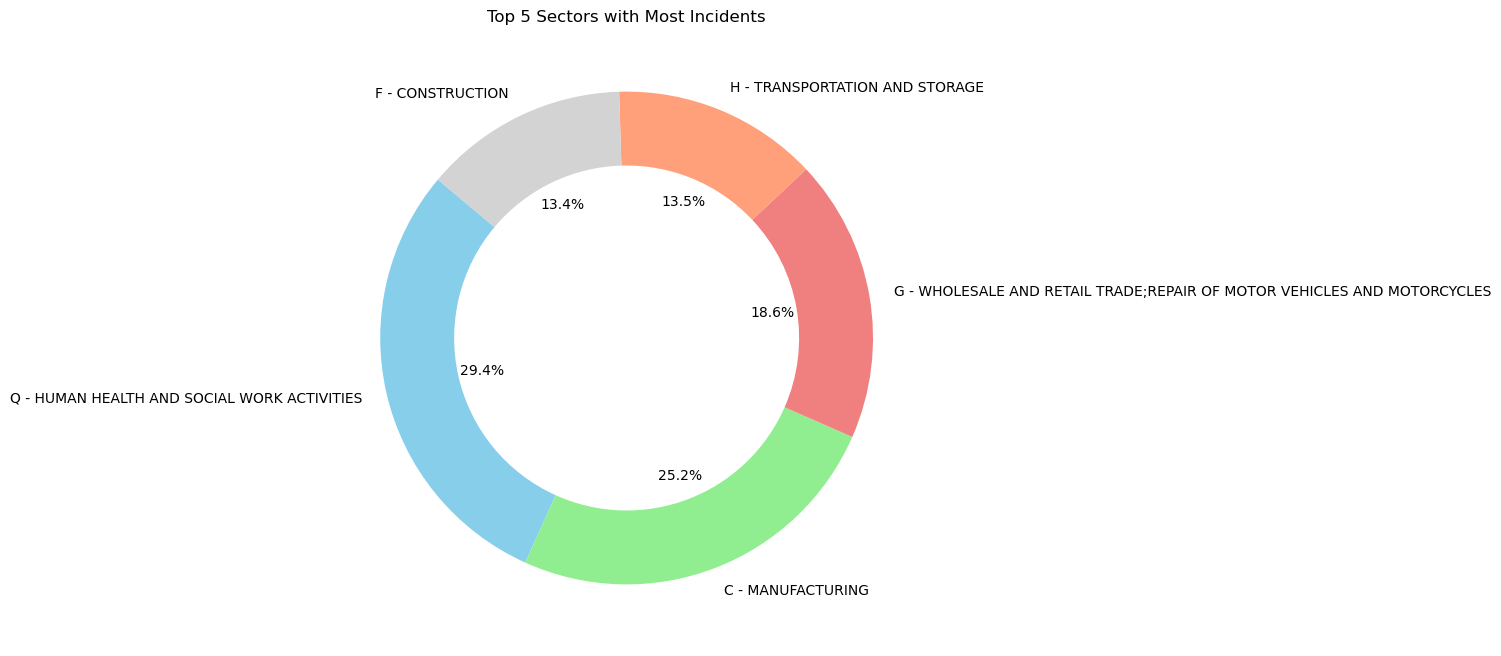

In [42]:
# Sector Analysis - Top 5 Sectors with Most Incidents using a donut chart
top_sectors = sector_distribution.head(5)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightgrey']
plt.figure(figsize=(8, 8))
plt.pie(top_sectors, labels=top_sectors.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Top 5 Sectors with Most Incidents')
plt.show()

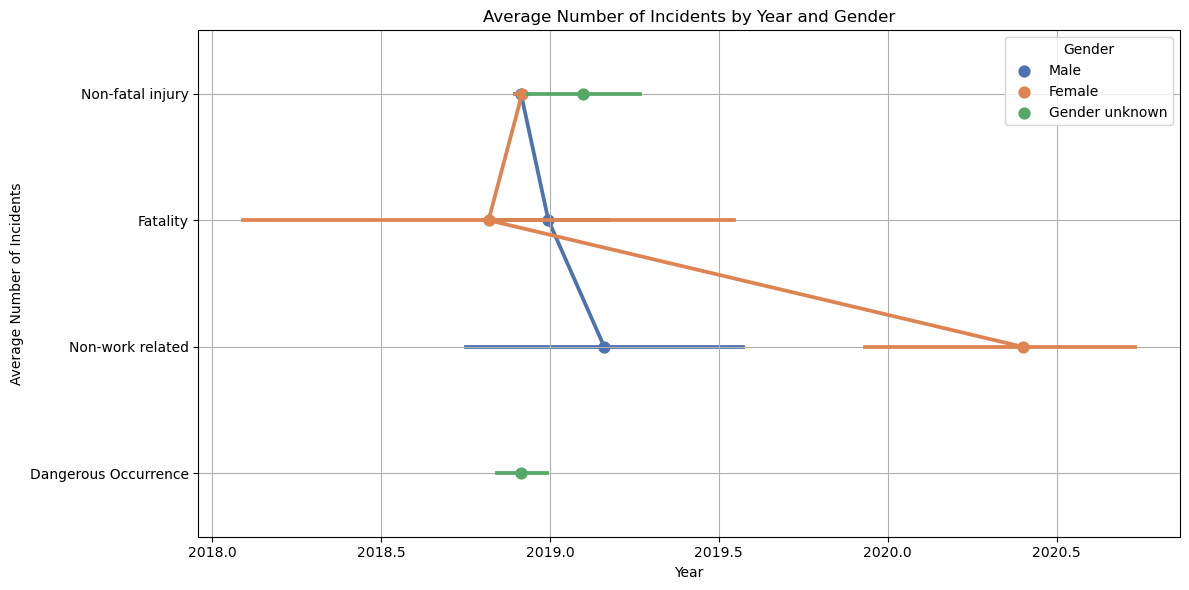

In [39]:
#Incidents by year and genger
plt.figure(figsize=(12, 6))
sns.pointplot(data=accidents_data, x='Year', y='Incident Type', hue='Gender', palette='deep')
plt.title('Average Number of Incidents by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Average Number of Incidents')
plt.grid(True)
plt.tight_layout()
#The breakdown by gender could reveal if one gender is more frequently involved in incidents than the other. 
#This could point to a need for targeted safety interventions or further investigation into the reasons behind such disparities.

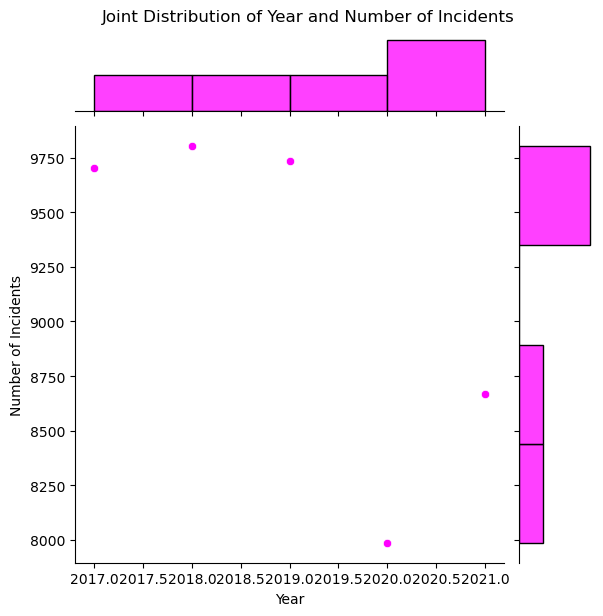

In [40]:
# For demonstration, let's calculate the number of incidents per year
# This step is just to ensure we have a 'Number of Incidents' column.
incidents_per_year = accidents_data.groupby('Year').size().reset_index(name='Number of Incidents')

# Now,we use sns.jointplot to visualize the relationship between 'Year' and 'Number of Incidents'
sns.jointplot(data=incidents_per_year, x='Year', y='Number of Incidents', kind='scatter', color='magenta')
plt.suptitle('Joint Distribution of Year and Number of Incidents', y=1.02)
plt.show()

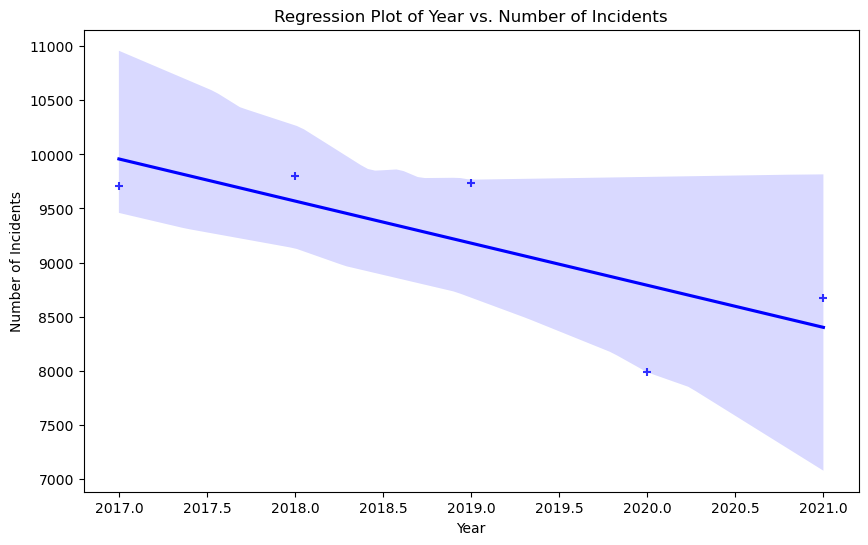

In [41]:
# Use sns.regplot for a regression line fit
plt.figure(figsize=(10, 6))
sns.regplot(data=incidents_per_year, x='Year', y='Number of Incidents', color='blue', marker='+')
plt.title('Regression Plot of Year vs. Number of Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()
#We cam see that numbers of incidets are going down.

In [22]:
# Calculate the count of incidents by 'Incident Type' and 'Gender'
incident_gender_distribution = accidents_data_cleaned.groupby(['Incident Type', 'Gender']).size()

# Convert the groupby result to a DataFrame and reset index for easier calculations
incident_gender_distribution_df = incident_gender_distribution.to_frame(name='Count').reset_index()

# Calculate the total incidents to use for percentage calculation
total_incidents = incident_gender_distribution_df['Count'].sum()

# Calculate the percentage of total incidents for each row
incident_gender_distribution_df['Percentage'] = (incident_gender_distribution_df['Count'] / total_incidents) * 100

# Pivot the DataFrame to have 'Incident Type' as rows, 'Gender' as columns, and 'Percentage' as values
incident_gender_distribution_pct_total = incident_gender_distribution_df.pivot(index='Incident Type', columns='Gender', values='Percentage')

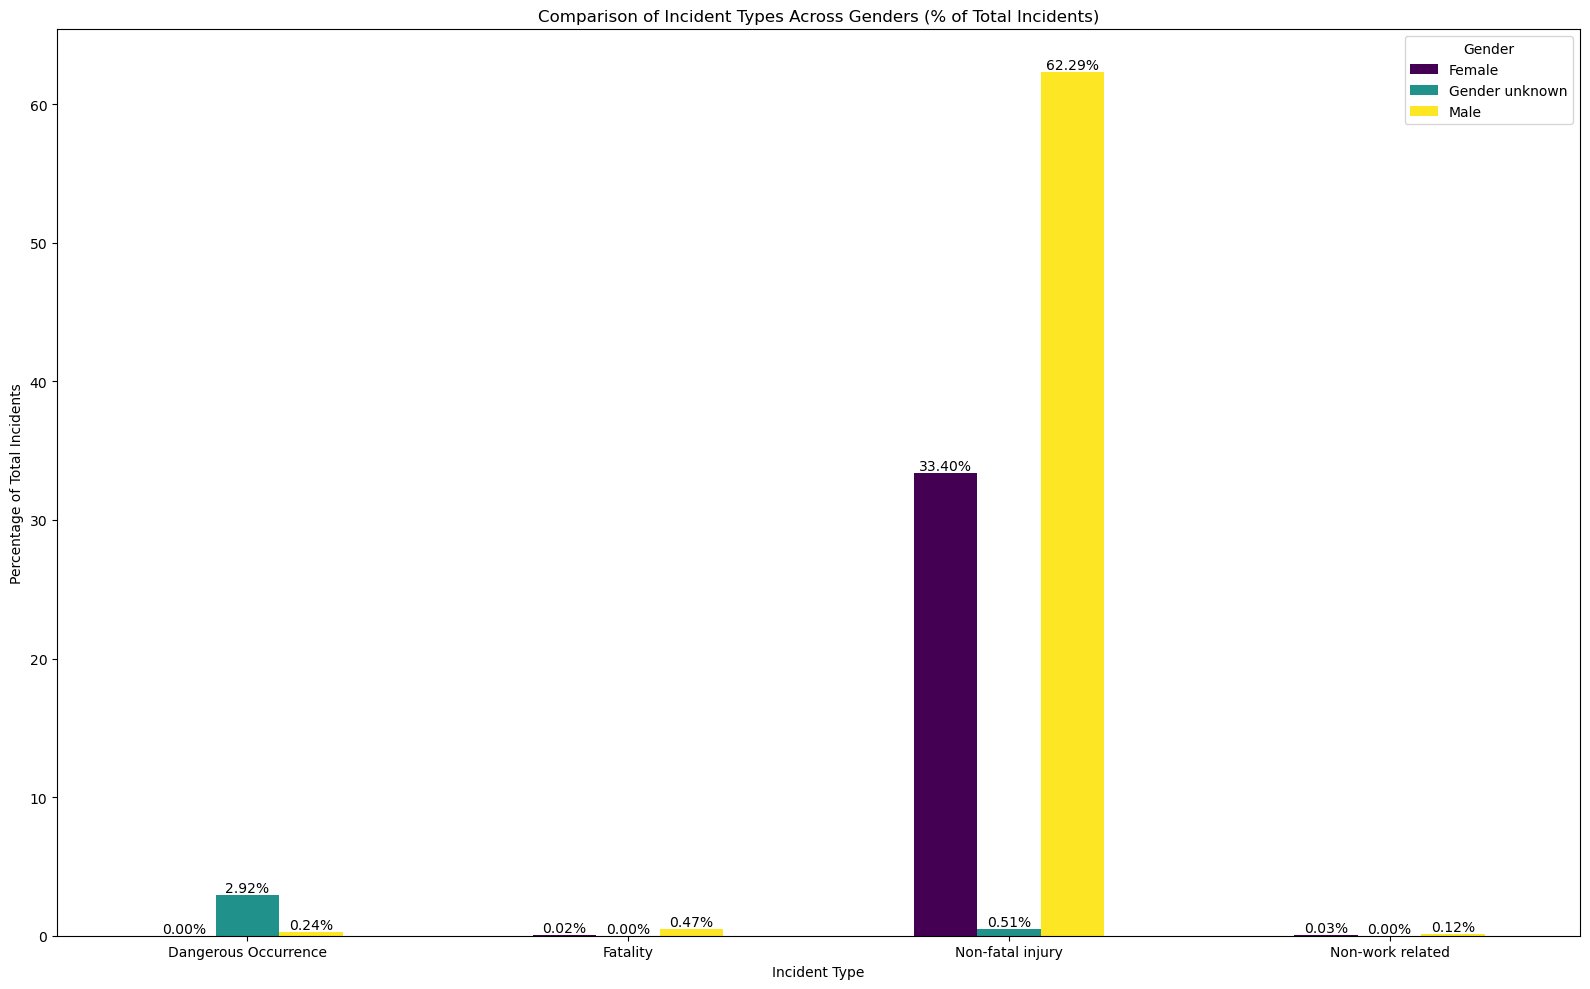

In [23]:
# Plotting the data and getting the figure, ax objects for annotations
fig, ax = plt.subplots(figsize=(16, 10))
incident_gender_distribution_pct_total.plot(kind='bar', colormap='viridis', ax=ax)
plt.title('Comparison of Incident Types Across Genders (% of Total Incidents)')
plt.xlabel('Incident Type')
plt.ylabel('Percentage of Total Incidents')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height, 
            f'{height:.2f}%', 
            ha='center', 
            va='bottom')

plt.show()
#Here we can see that mostl of the injuries are non-fatal, which is good and that men getting injured more.

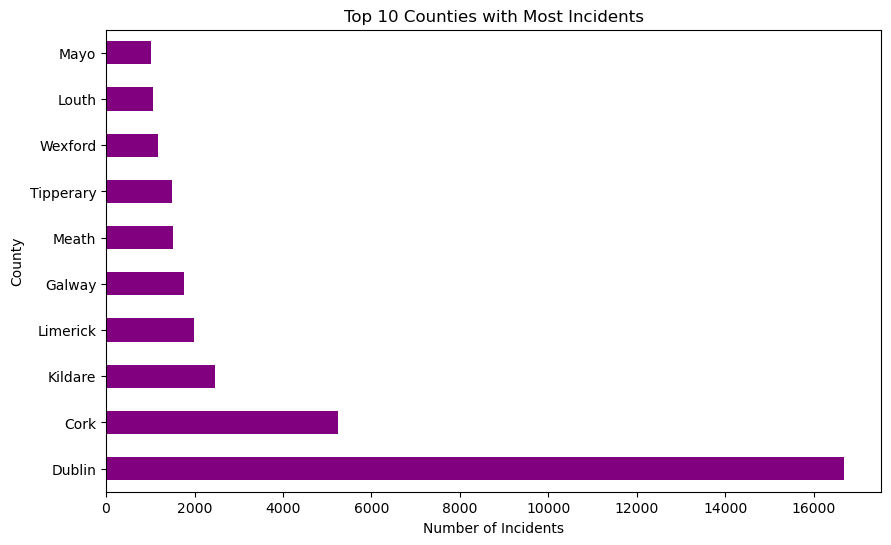

In [24]:
# County-wise Distribution of Incidents
county_distribution = accidents_data_cleaned['County'].value_counts().head(10)  # Top 10 counties

plt.figure(figsize=(10, 6))
county_distribution.plot(kind='barh', color='purple')
plt.title('Top 10 Counties with Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('County')
plt.show()
#Here we can see most incidents are in Dublin. Dublin holds a lot of people more than 2 million. 
#There are more work, opportunities and people. Of course its gonna be on the top.

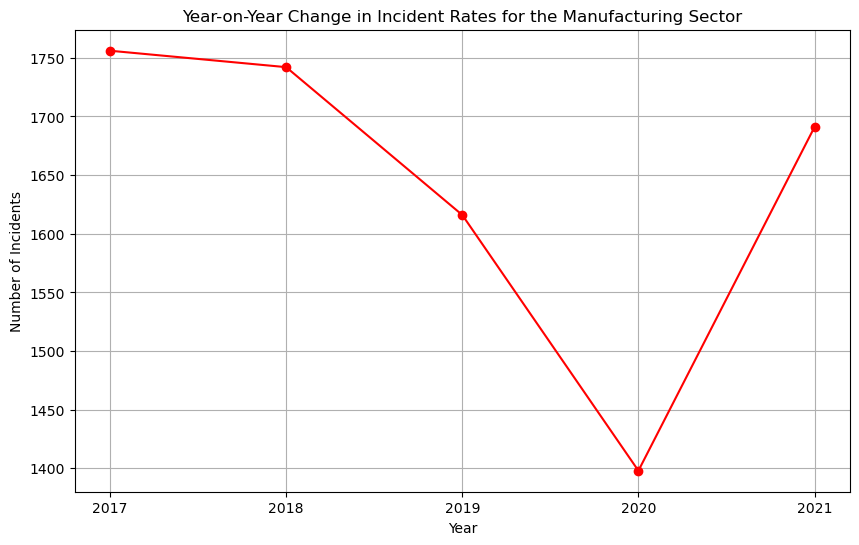

In [25]:
# Year-on-Year Change in Incident Rates for the 'Manufacturing' Sector as an example
manufacturing_data = accidents_data_cleaned[accidents_data_cleaned['NACE Sector'] == 'C - MANUFACTURING']
manufacturing_yearly = manufacturing_data.groupby('Year').size()

plt.figure(figsize=(10, 6))
manufacturing_yearly.plot(kind='line', marker='o', color='red')
plt.title('Year-on-Year Change in Incident Rates for the Manufacturing Sector')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(manufacturing_yearly.index)
plt.grid(True)
plt.show()

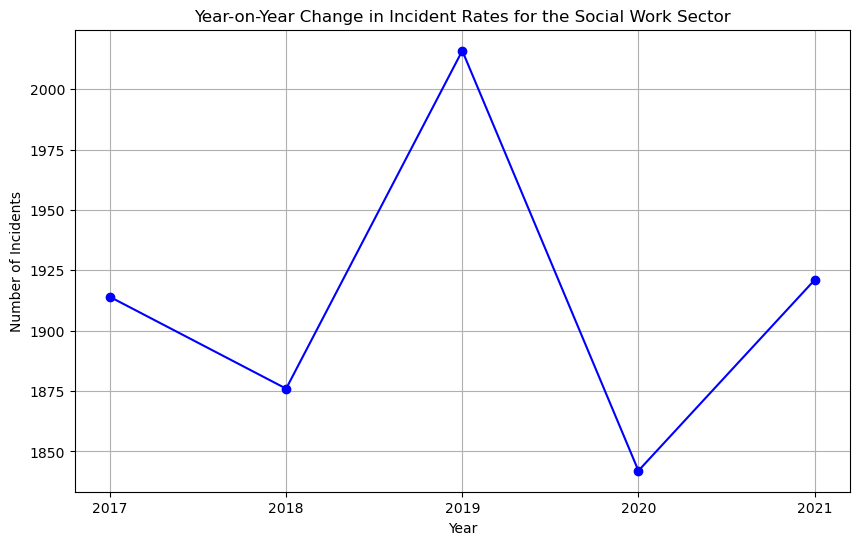

In [43]:
# Filter data for the "Social Work" sector
social_work_data = accidents_data_cleaned[accidents_data_cleaned['NACE Sector'] == 'Q - HUMAN HEALTH AND SOCIAL WORK ACTIVITIES']

# Group by 'Year' and count the incidents
social_work_yearly = social_work_data.groupby('Year').size()

# Plot the year-on-year change in incident rates
plt.figure(figsize=(10, 6))
social_work_yearly.plot(kind='line', marker='o', color='blue')
plt.title('Year-on-Year Change in Incident Rates for the Social Work Sector')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(social_work_yearly.index)
plt.grid(True)
plt.show()

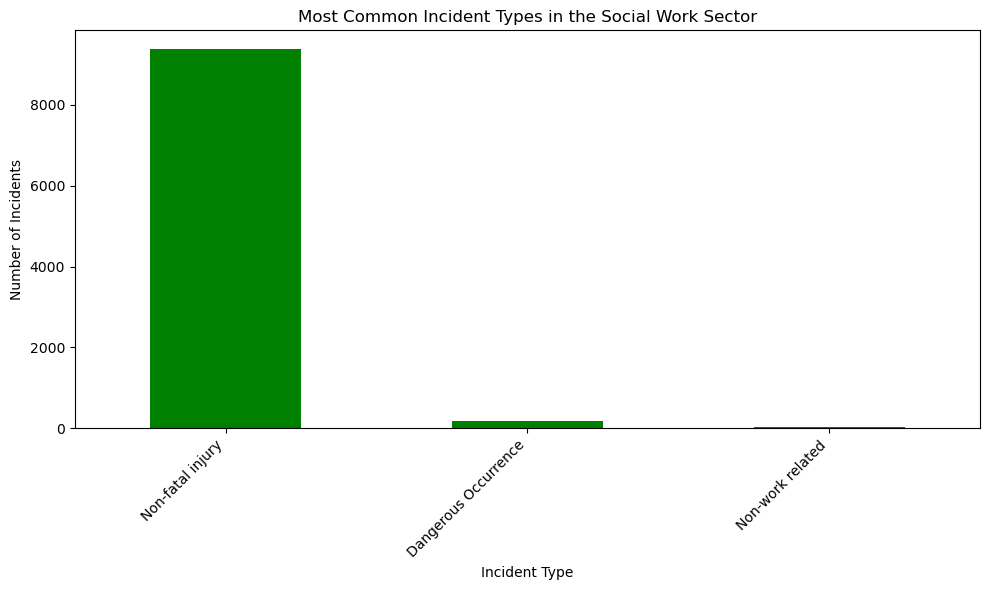

In [44]:
# Aggregate incident types for the "Social Work" sector
incident_types_social_work = social_work_data['Incident Type'].value_counts()

# Visualize the most common incident types
plt.figure(figsize=(10, 6))
incident_types_social_work.plot(kind='bar', color='green')
plt.title('Most Common Incident Types in the Social Work Sector')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

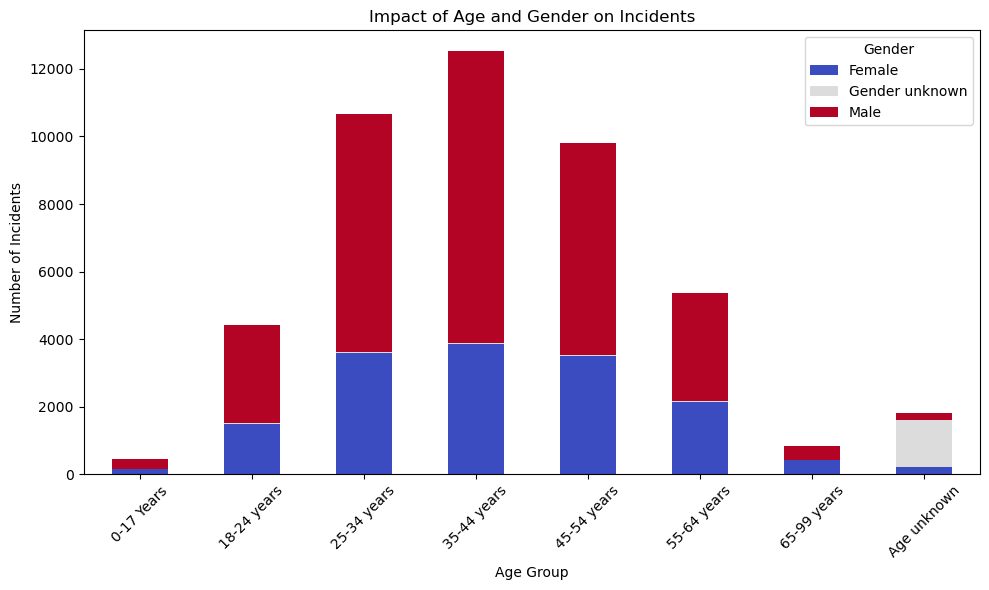

In [26]:
# Impact of Age and Gender (This analysis combines the previously discussed age and gender impacts)
plt.figure(figsize=(10, 6))
age_gender_distribution = pd.crosstab(index=accidents_data_cleaned['Age'], columns=accidents_data_cleaned['Gender'])
age_gender_distribution.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Impact of Age and Gender on Incidents')
plt.xlabel('Age Group')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#We can see here that most people who get in to the incidents are people from 35-44 years old. Makes sense, those are the years of most employees.

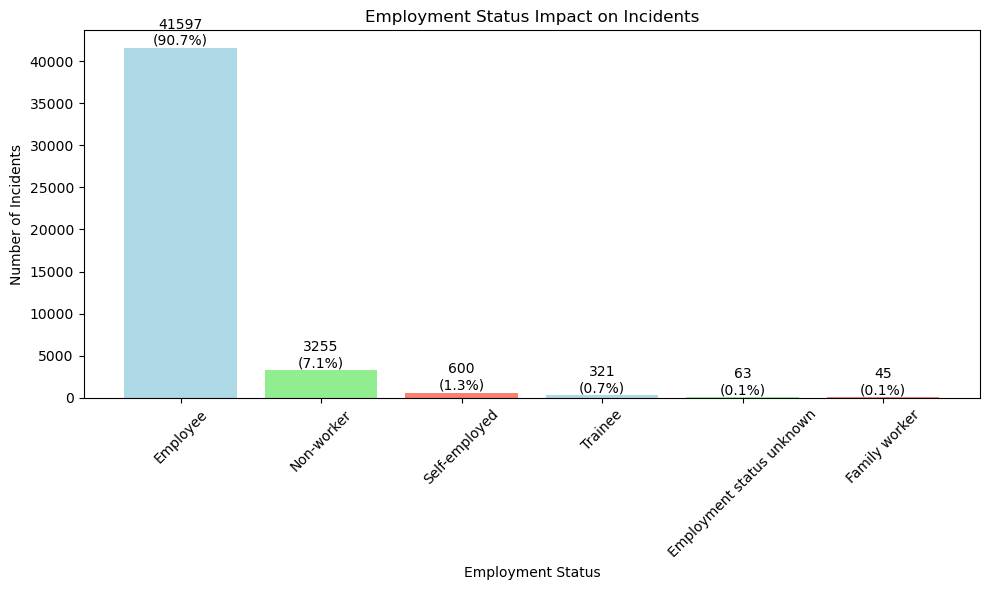

In [28]:
# Employment Status Impact shown as a bar chart with counts and percentages annotated
plt.figure(figsize=(10, 6))
employment_status_distribution = accidents_data_cleaned['Employment Status'].value_counts()
total_incidents = employment_status_distribution.sum()  # Total number of incidents for percentage calculation

bars = plt.bar(employment_status_distribution.index, employment_status_distribution.values, color=['lightblue', 'lightgreen', 'salmon'])

# Annotate bars with count and percentage
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_incidents) * 100  # Calculate percentage
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.title('Employment Status Impact on Incidents')
plt.xlabel('Employment Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Employed people are involed in incidents more.

In [29]:
#print(data.columns)

# Summary of Findings:
Trends Over Time: We looked at how many incidents happened each year. This helps us see if things are getting better (fewer incidents) or if there's more we need to worry about (more incidents).

Where Incidents Happen: We found out which sectors (like construction, manufacturing, etc.) have the most incidents. This tells us which areas we need to focus on for improving safety.

Who's Involved: By looking at details like the age and gender of people involved in incidents, we can get a better idea of who is most at risk.

Types of Incidents: Understanding what kinds of incidents are happening helps us figure out what safety measures could prevent them.

# Visualizations
We used graphs to make it easier to see these patterns:

Bar charts showed us the number of incidents in different sectors and changes over the years.
Line graphs helped visualize trends over time, making it easier to see if incidents are increasing or decreasing.
Recommendations
Based on what we've found, here are some simple steps that could help reduce incidents:

Focus on High-Risk Sectors: Sectors with lots of incidents should get extra attention for safety training and equipment upgrades.

Target Safety Training: Knowing which age groups and genders are most involved in incidents can help tailor safety training to be more effective.

Learn from Incident Types: Understanding the most common types of incidents tells us what specific safety measures (like better protective gear or machine guards) could prevent them.

Keep an Eye on Trends: Watching how incident trends change over time helps us know if safety measures are working or if new strategies are needed.


# Moving Forward
By focusing on these areas, companies and safety officials can work towards a safer environment for everyone. Remember, improving safety is an ongoing process that requires attention to detail and a willingness to adapt strategies as new information comes to light.

This summary and recommendations are based on the analyses and discussions we've had. Implementing these recommendations could lead to meaningful improvements in safety and incident prevention.